## Import Libraries

In [3]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import os
import math
import statistics
import warnings

from scipy  import stats

## Set Styles

#### Pandas

In [4]:
pd.set_option( 'display.max_columns', None )

#### MatPlotLib

In [5]:
%matplotlib inline

#### Seaborn

In [6]:
sns.set( rc = { 'figure.figsize' : ( 24, 5 ) } )

#### Environment

In [7]:
warnings.filterwarnings('ignore')

## Load Data

In [12]:
def load_data():
    # Get data directory
    data_files_path = os.path.join( os.getcwd() + '', '..', '..', 'data', 'housing_prices', '' )
    data_files      = os.listdir( data_files_path )
    df              = []

    # Load files from data directory
    for csv_file in data_files:
        if csv_file != '.ipynb_checkpoints':
            df.append( pd.read_csv( '../../data/housing_prices/' + csv_file ) )

    print( str( data_files ) + "\n" )

    # Assign data to variabbles
    test_X, test_ID  = ( df[0].drop( [ 'Id' ], axis = 1 ), df[0][ 'Id' ] )
    train_X, train_y = ( df[1].drop( [ 'Id', 'SalePrice' ], axis = 1 ), df[1][ 'SalePrice' ] )
    
    print( "test_X: " + str( test_X.shape ) + "\ntest_ID: " + str( test_ID.shape ) + "\ntrain_X: " + str( train_X.shape ) + "\ntrain_y: " + str( train_y.shape ) )

    return ( test_X, test_ID, train_X, train_y )

In [27]:
test_X, test_ID, train_X, train_y = load_data()

['test.csv', 'train.csv']

test_X: (1459, 79)
test_ID: (1459,)
train_X: (1460, 79)
train_y: (1460,)


In [28]:
train_X.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Features

- `SalePrice` - the property's sale price in dollars. This is the target variable that you're trying to predict.
- `MSSubClass` The building class
- `MSZoning` The general zoning classification
- `LotFrontage` Linear feet of street connected to property
- `LotArea` Lot size in square feet
- `Street` Type of road access
- `Alley` Type of alley access
- `LotShape` General shape of property
- `LandContour` Flatness of the property
- `Utilities` Type of utilities available
- `LotConfig` Lot configuration
- `LandSlope` Slope of property
- `Neighborhood` Physical locations within Ames city limits
- `Condition1` Proximity to main road or railroad
- `Condition2` Proximity to main road or railroad (if a second is present)
- `BldgType` Type of dwelling
- `HouseStyle` Style of dwelling
- `OverallQual` Overall material and finish quality
- `OverallCond` Overall condition rating
- `YearBuilt` Original construction date
- `YearRemodAdd` Remodel date
- `RoofStyle` Type of roof
- `RoofMatl` Roof material
- `Exterior1st` Exterior covering on house
- `Exterior2nd` Exterior covering on house (if more than one material)
- `MasVnrType` Masonry veneer type
- `MasVnrArea` Masonry veneer area in square feet
- `ExterQual` Exterior material quality
- `ExterCond` Present condition of the material on the exterior
- `Foundation` Type of foundation
- `BsmtQual` Height of the basement
- `BsmtCond` General condition of the basement
- `BsmtExposure` Walkout or garden level basement walls
- `BsmtFinType1` Quality of basement finished area
- `BsmtFinSF1` Type 1 finished square feet
- `BsmtFinType2` Quality of second finished area (if present)
- `BsmtFinSF2` Type 2 finished square feet
- `BsmtUnfSF` Unfinished square feet of basement area
- `TotalBsmtSF` Total square feet of basement area
- `Heating` Type of heating
- `HeatingQC` Heating quality and condition
- `CentralAir` Central air conditioning
- `Electrical` Electrical system
- `1stFlrSF` First Floor square feet
- `2ndFlrSF` Second floor square feet
- `LowQualFinSF` Low quality finished square feet (all floors)
- `GrLivArea` Above grade (ground) living area square feet
- `BsmtFullBath` Basement full bathrooms
- `BsmtHalfBath` Basement half bathrooms
- `FullBath` Full bathrooms above grade
- `HalfBath` Half baths above grade
- `Bedroom` Number of bedrooms above basement level
- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

## Global Functions

###### Function

In [17]:
def get_numerical_columns( df ):
    return df.select_dtypes( include = [ 'int64','float64' ] ).columns

def get_categorical_columns ( df ):
    return df.select_dtypes( include = [ 'object' ] ).columns

###### Function

In [18]:
def get_facet_grid( df, feature_type ):
    if feature_type == 'integer':
        facet_grid = pd.melt( df, value_vars = sorted( get_numerical_columns( df ) ) )
        grid_plot  = sns.FacetGrid( facet_grid, col = 'variable', col_wrap = 7, sharex = False, sharey = False)
        grid_plot  = grid_plot.map( sns.distplot, 'value' )
        
        return grid_plot
    
    elif feature_type == 'category':
        facet_grid = pd.melt( df, value_vars = sorted( get_categorical_columns( df ) ) )
        grid_plot  = sns.FacetGrid( facet_grid, col = 'variable', col_wrap = 7, sharex = False, sharey = False )
        grid_plot  = grid_plot.map( sns.countplot, 'value' )

        plt.xticks( rotation = 'vertical' )
        [ plt.setp( ax.get_xticklabels(), rotation = 60 ) for ax in grid_plot.axes.flat ]
        grid_plot.fig.tight_layout()
        
        return grid_plot

###### Function

In [19]:
def na_heatmap( df ):
    fig, ax = plt.subplots( figsize = ( 25, 5 ) )
    sns.heatmap( df.isnull(), yticklabels = False, cbar = False )

## Preprocessing

#### Drop Columns with Majority Missing Values

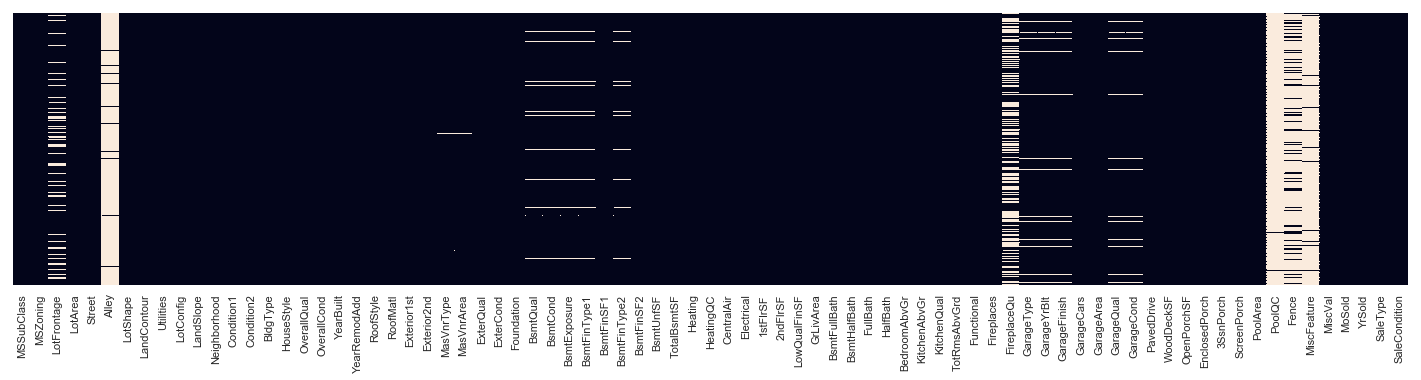

In [31]:
na_heatmap( train_X )

###### Function

In [21]:
def drop_missing_features( df, threshold ):
    drop_columns = []
    na_count     = df.isna().sum()

    for i in range( len( na_count ) ):
        if ( na_count[i] / len( df ) ) > threshold:
            drop_columns.append( df.columns[i] )
            
    return drop_columns

In [41]:
features_to_drop = drop_missing_features( train_X, 0.8 )
features_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [42]:
train_X.drop( features_to_drop, axis = 1, inplace = True )
test_X.drop( features_to_drop, axis = 1, inplace = True )

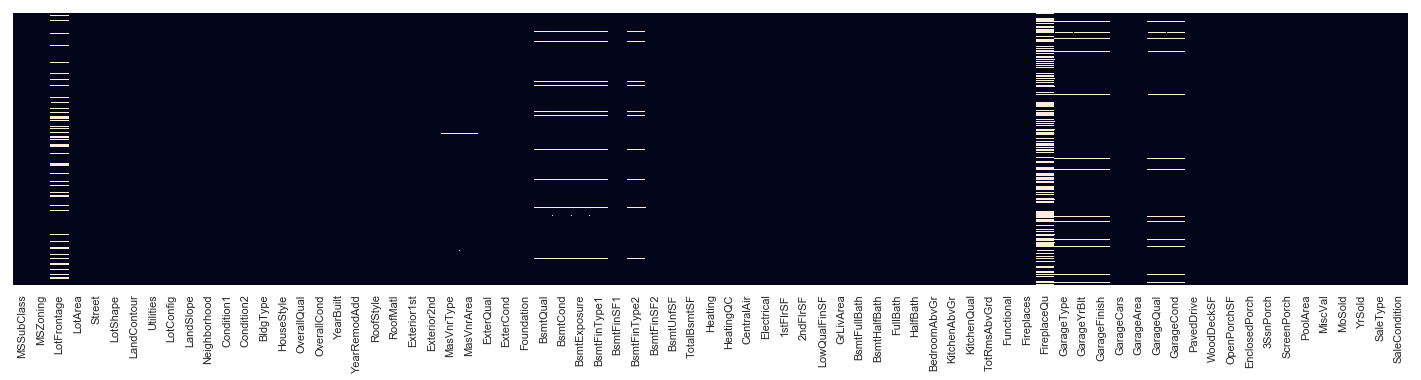

In [43]:
na_heatmap( train_X )

#### Explore Categorcial Data

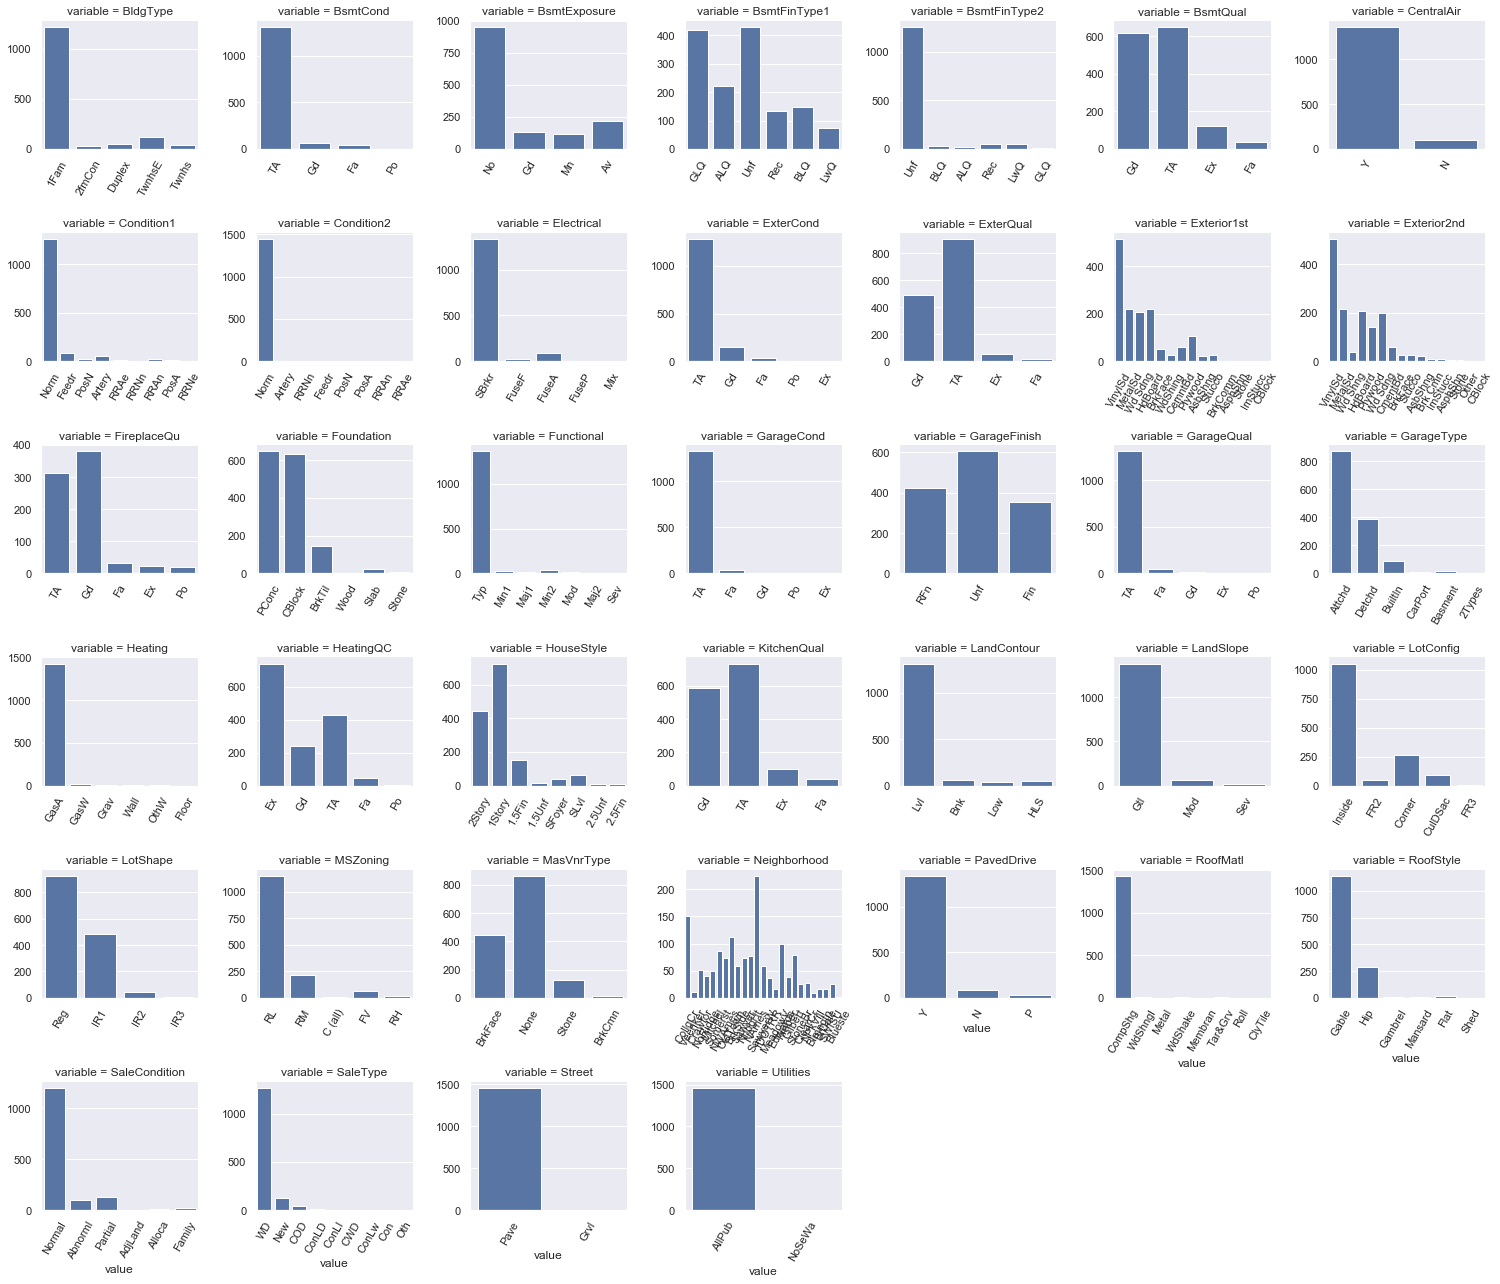

In [23]:
get_facet_grid( train_X, 'category' )

###### Function

In [44]:
def convert_to_ranked( df ):
    df[ 'BsmtCond'     ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'BsmtExposure' ].replace( { 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4 }, inplace = True )
    df[ 'BsmtFinType1' ].replace( { 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6 }, inplace = True )
    df[ 'BsmtFinType2' ].replace( { 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6 }, inplace = True )
    df[ 'BsmtQual'     ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'ExterCond'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'ExterQual'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'FireplaceQu'  ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'Functional'   ].replace( { 'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod' : 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8 }, inplace = True )
    df[ 'GarageCond'   ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'GarageFinish' ].replace( { 'Unf' : 1, 'RFn' : 2, 'Fin' : 3 }, inplace = True )
    df[ 'GarageQual'   ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'HeatingQC'    ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'KitchenQual'  ].replace( { 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 }, inplace = True )
    df[ 'LandSlope'    ].replace( { 'Sev' : 1, 'Mod' : 2, 'Gtl' : 3 }, inplace = True )
    df[ 'LandContour'  ].replace( { 'Low' : 1, 'HLS' : 2, 'Bnk' : 3, 'Lvl' : 4 }, inplace = True )
    df[ 'LotShape'     ].replace( { 'Reg' : 1, 'IR1' : 2, 'IR2' : 3, 'IR3' : 4 }, inplace = True )
    df[ 'Utilities'    ].replace( { 'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4 }, inplace = True )

In [45]:
convert_to_ranked( train_X )
convert_to_ranked( test_X )

In [46]:
train_X[ 'MSSubClass' ] = train_X[ 'MSSubClass' ].apply( lambda x : str( x ) )
test_X[ 'MSSubClass' ] = test_X[ 'MSSubClass' ].apply( lambda x : str( x ) )

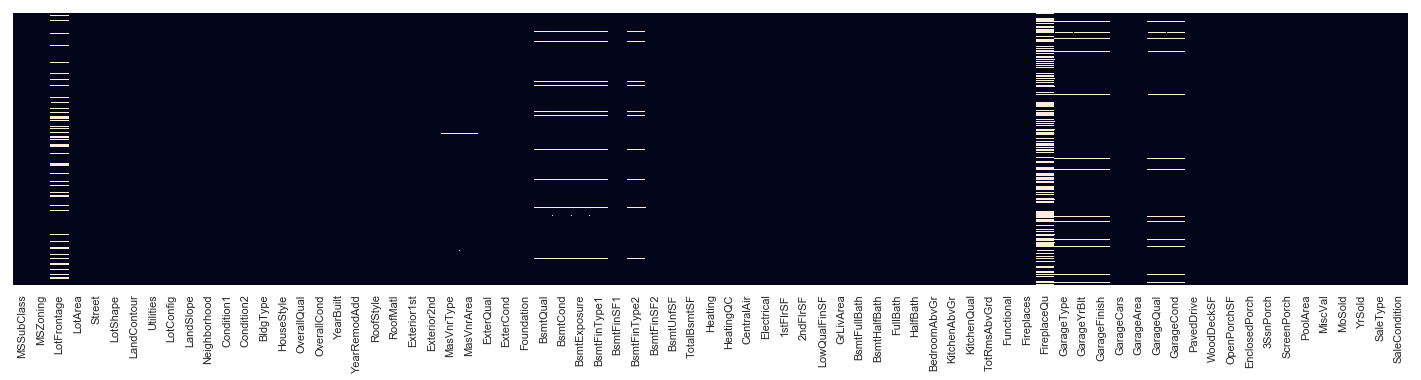

In [47]:
na_heatmap( train_X )

#### Imputate Missing Values in Ordinal Features Above

###### Function

In [49]:
ranked_columns = [ 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                   'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond' ]

In [50]:
train_X[ ranked_columns ] = train_X[ ranked_columns ].fillna( 0 )
test_X[ ranked_columns ] = test_X[ ranked_columns ].fillna( 0 )

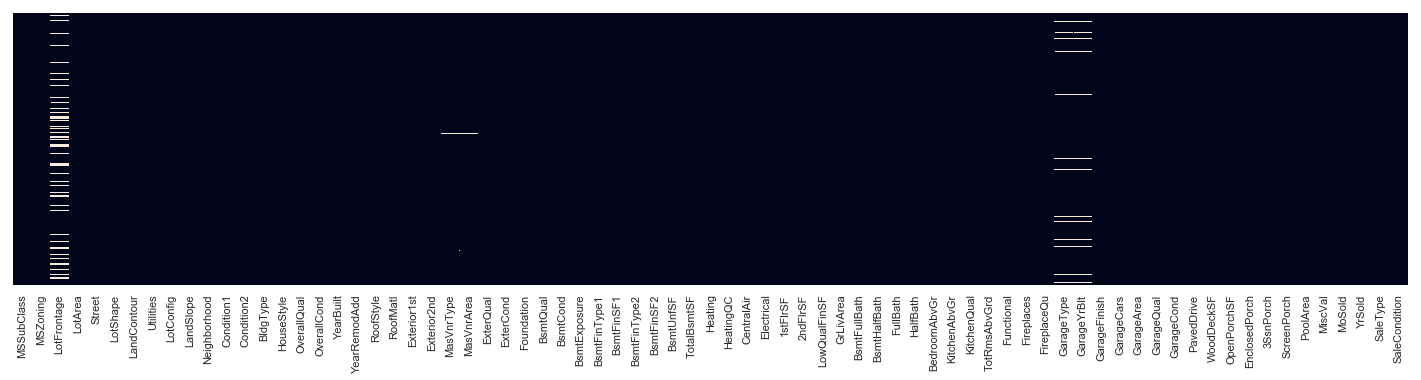

In [51]:
na_heatmap( train_X )

#### Impute `GarageType`

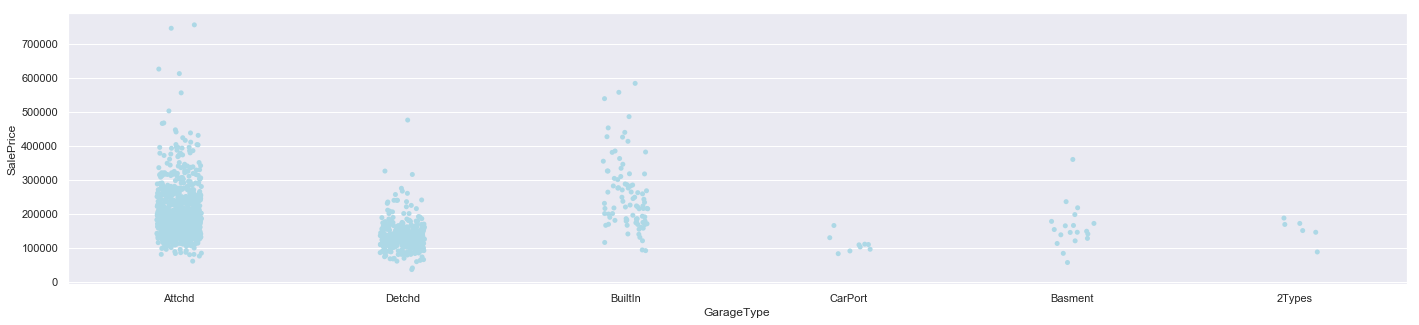

In [53]:
sns.stripplot( x      = 'GarageType', 
               y      = train_y, 
               data   = train_X, 
               jitter = True, 
               dodge  = True,
               color  = 'lightblue' )

###### Function

In [54]:
def impute_garage_type( X, y ):
    # Get indexes of GarageType equal to Attchd and Detchd
    attchd = X.index[ X[ 'GarageType' ] == 'Attchd' ].tolist()
    detchd = X.index[ X[ 'GarageType' ] == 'Detchd' ].tolist()
    
    # Get mean SalePrice for these categories ovrall
    attchd   = y[ attchd ].mean()
    detchd   = y[ detchd ].mean()
    y_attchd = 0
    y_detchd = 0
    
    # For every observation perform on missing values
    for i in range( len( X ) ):
        if( pd.isnull( X[ 'GarageType' ][i] ) ):
            y_attchd = -( abs( y[i] - attchd ) )
            y_detchd = -( abs( y[i] - detchd ) )
            
            X[ 'GarageType' ][i] = 'Attchd' if y_attchd < y_detchd else 'Detchd'

In [58]:
impute_garage_type( train_X, train_y ) 
test_X.loc[ pd.isnull( test_X[ 'GarageType' ] ), 'GarageType' ] = test_X[ 'GarageType' ].mode()[0]

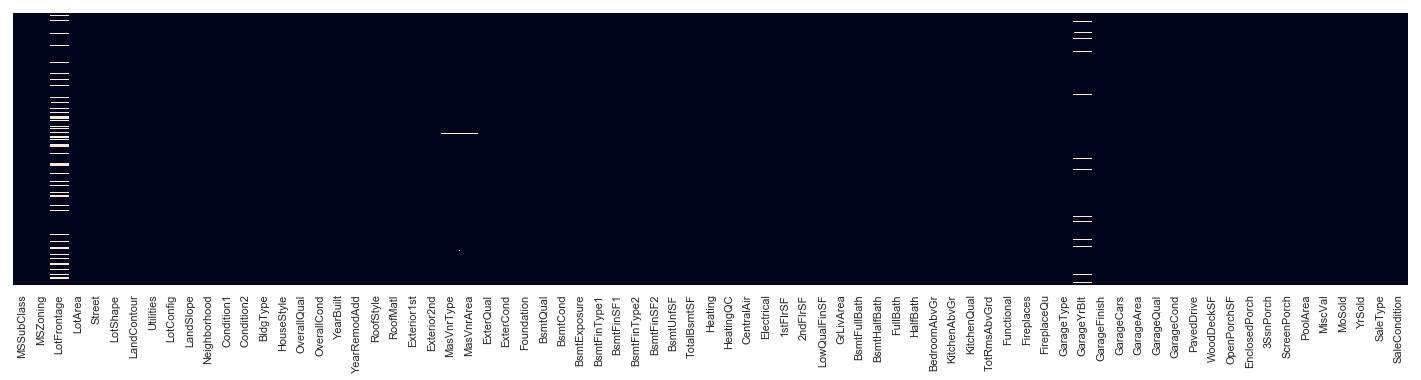

In [59]:
na_heatmap( train_X )

#### Impute `GarageYrBlt`

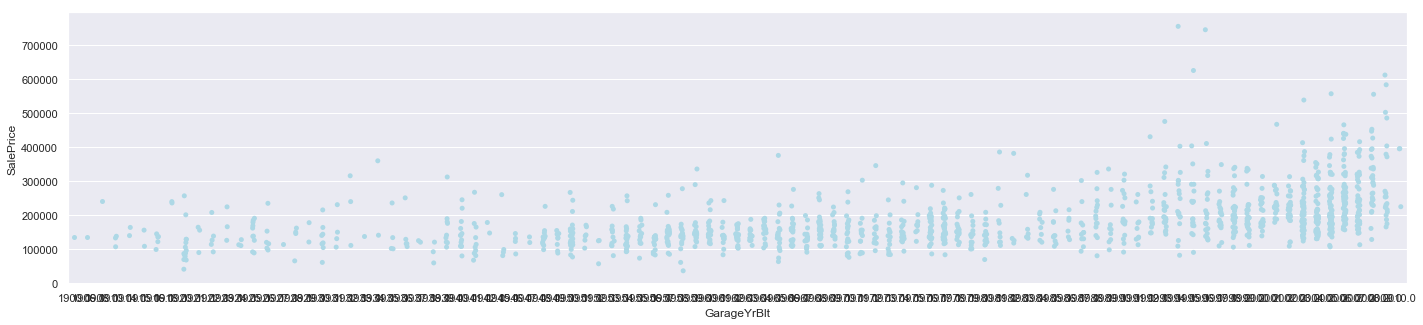

In [60]:
strip_plot = sns.stripplot( x      = 'GarageYrBlt', 
                            y      = train_y, 
                            data   = train_X, 
                            jitter = True, 
                            dodge  = True,
                            color  = 'lightblue' )

###### Function

In [61]:
def impute_garageyrblt( df ):
    sorted_years       = df[ 'GarageYrBlt' ].sort_values()
    garage_median_year = int( round( statistics.median( sorted_years ) ) )

    df[ 'GarageYrBlt' ].fillna( garage_median_year, inplace = True )

In [62]:
impute_garageyrblt( train_X )
impute_garageyrblt( test_X )

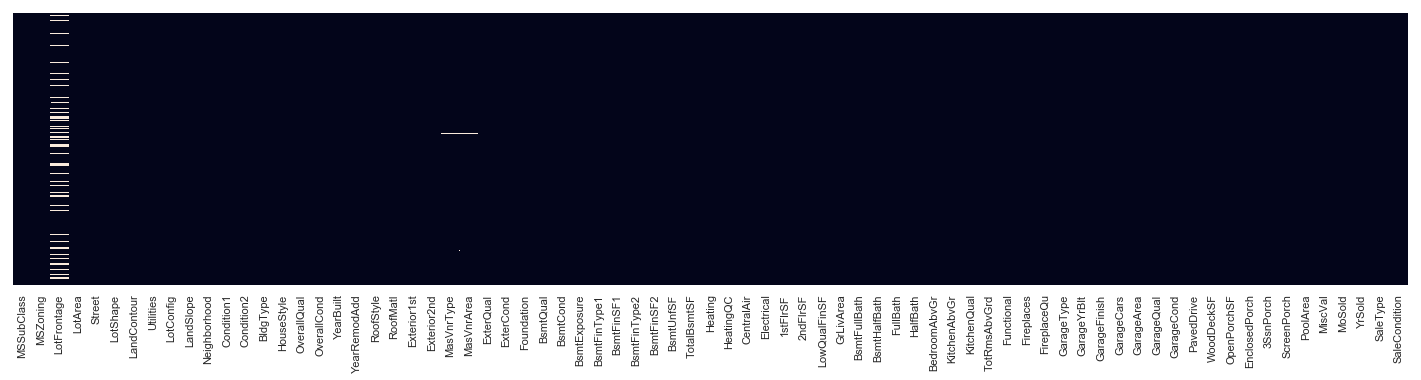

In [63]:
na_heatmap( train_X )

#### Impute Veneer

In [64]:
train_X[ [ 'MasVnrType' ] ] = train_X[ [ 'MasVnrType' ] ].fillna( 'None' )
train_X[ [ 'MasVnrArea' ] ] = train_X[ [ 'MasVnrArea' ] ].fillna( 0.0 )

test_X[ [ 'MasVnrType' ] ] = test_X[ [ 'MasVnrType' ] ].fillna( 'None' )
test_X[ [ 'MasVnrArea' ] ] = test_X[ [ 'MasVnrArea' ] ].fillna( 0.0 )

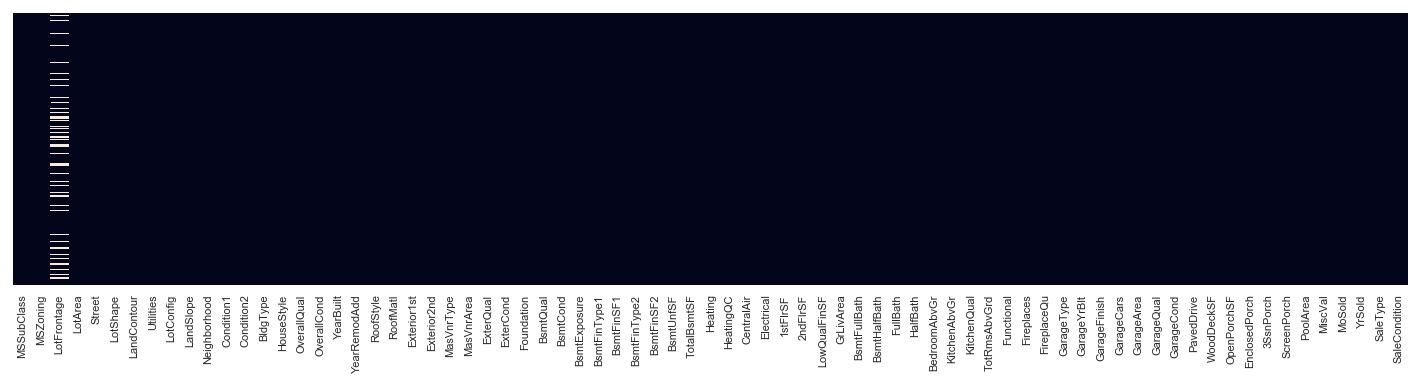

In [65]:
na_heatmap( train_X )

####  Categorize `YrSold` & `MoSold`

In [66]:
def stringify_year_and_month( df ):
    df[ 'YrSold' ].replace( { 2006 : '2006', 2007 : '2007', 2008 : '2008', 2009 : '2009', 2010 : '2010' }, inplace = True )
    df[ 'MoSold' ].replace( { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar',  4 : 'Apr',  5 : 'May',  6 : 'Jun',
                              7 : 'Jul', 8 : 'Aug', 9 : 'sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec' }, inplace = True )

In [67]:
stringify_year_and_month( train_X )
stringify_year_and_month( test_X )

#### Check for Other Missing Categorical

In [78]:
pd.DataFrame( len( train_X[ get_categorical_columns ] ) - train_X[ get_categorical_columns ].count() )

,0
MSSubClass,0
MSZoning,0
Street,0
LotConfig,0
Neighborhood,0
Condition1,0
Condition2,0
BldgType,0
HouseStyle,0
RoofStyle,0


In [80]:
train_X.loc[ pd.isnull( train_X[ 'Electrical' ] ), 'Electrical' ] = train_X['Electrical'].mode()[0]
test_X.loc[ pd.isnull( test_X[ 'Electrical' ] ), 'Electrical' ] = test_X['Electrical'].mode()[0]

#### Impute `LotFrontage`

In [81]:
column_mean = train_X[ 'LotFrontage' ].mean()
train_X[ 'LotFrontage' ].fillna( column_mean, inplace = True )

column_mean = test_X[ 'LotFrontage' ].mean()
test_X[ 'LotFrontage' ].fillna( column_mean, inplace = True )

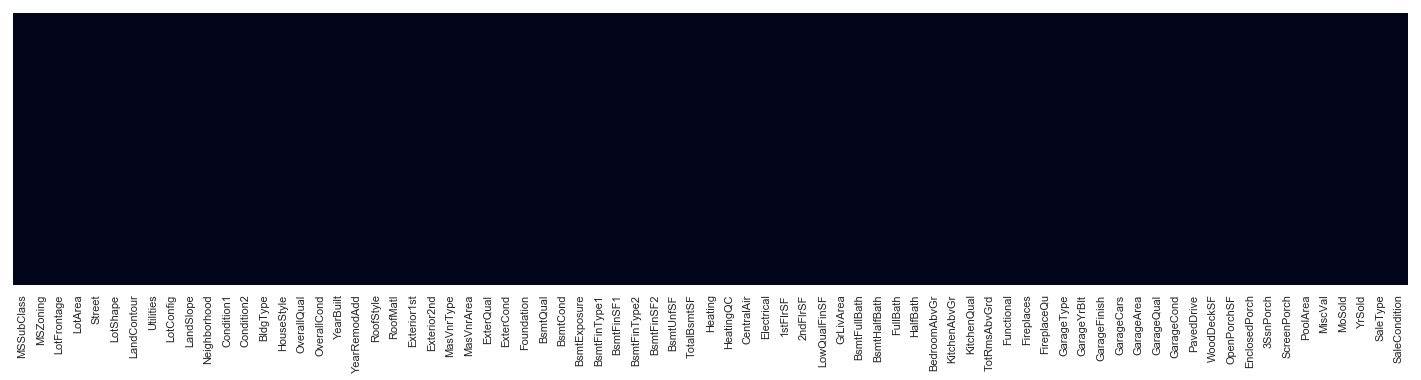

In [82]:
na_heatmap( train_X )

##### Transform Data

###### Function

In [83]:
def winsor( df, features ):
    for i in range( 1, len( features ) ):
        X_j                 = df[ features[i] ]
        std_cutoff          = np.mean( X_j ) + ( 3 * np.std( X_j ) )
        sort_X_j            = X_j.sort_values( ascending = False )
        count_over_3_std    = len( sort_X_j[ sort_X_j > std_cutoff ] )
        perc_outside_3_std  = count_over_3_std / len( X_j )
        df[ features[i] ]   = stats.mstats.winsorize( X_j, limits = [0, perc_outside_3_std] )

In [88]:
features_to_winsor = [ 'LotFrontage', 'TotalBsmtSF' ]

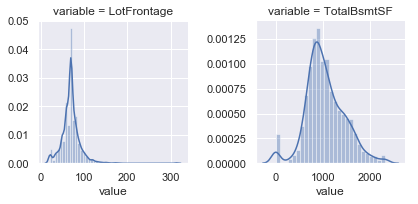

In [89]:
get_facet_grid( train_X[ features_to_winsor ], 'integer' )

In [90]:
winsor( train_X, features_to_winsor )
winsor( test_X, features_to_winsor )

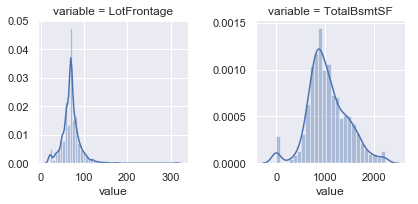

In [91]:
get_facet_grid( train_X[ features_to_winsor ], 'integer' )

In [92]:
features_to_log = [ '1stFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'LotArea', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF' ]

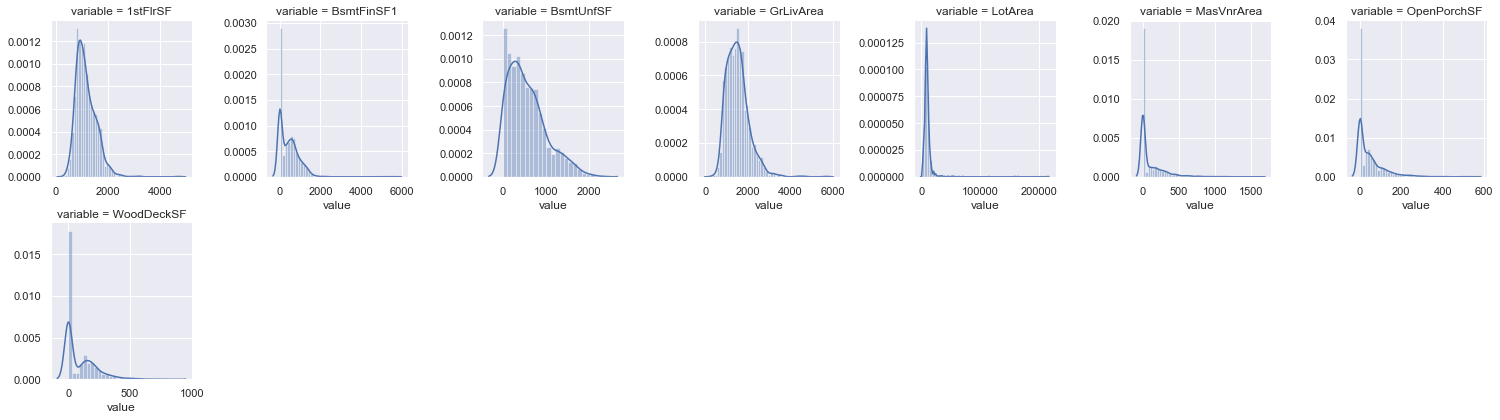

In [93]:
get_facet_grid( train_X[ features_to_log ], 'integer' )

In [94]:
for column in features_to_log:
    train_X.loc[ :, column ] = np.log1p( train_X[ column ] )
    
for column in features_to_log:
    test_X.loc[ :, column ] = np.log1p( test_X[ column ] )

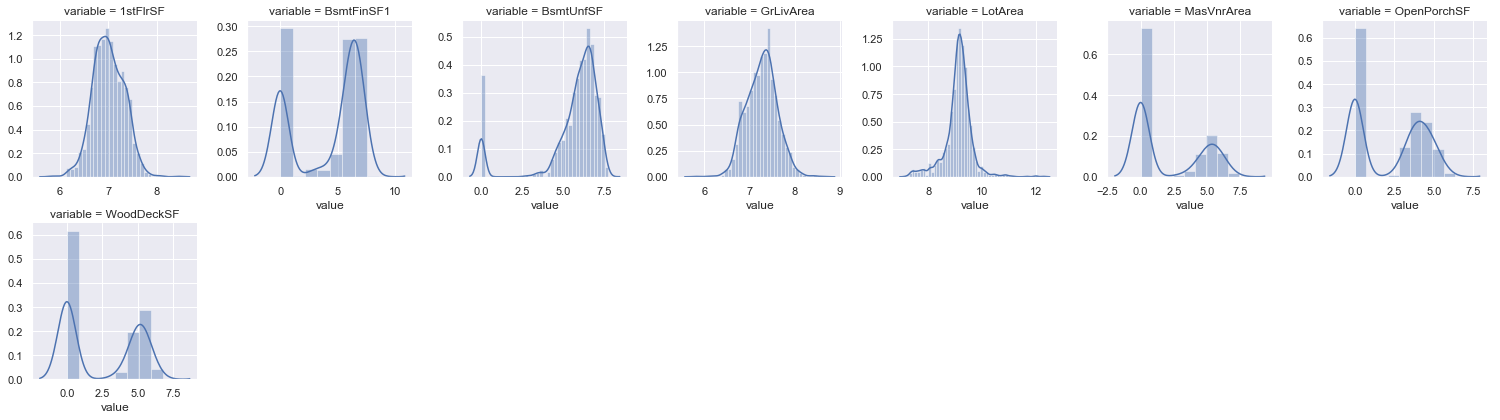

In [95]:
get_facet_grid( train_X[ features_to_log ], 'integer' )

#### Transform `SalePrice`

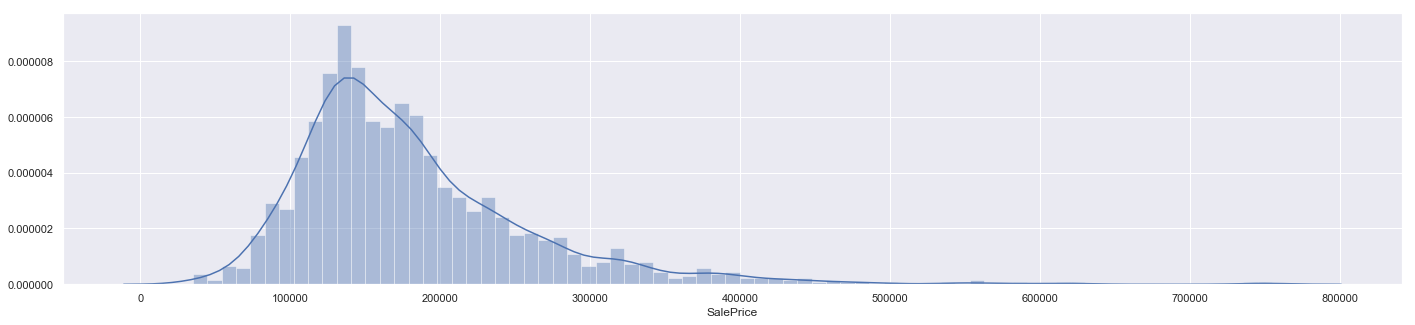

In [58]:
sns.distplot( train_y, bins = 75 )

In [59]:
train_y = np.log1p( train_y )

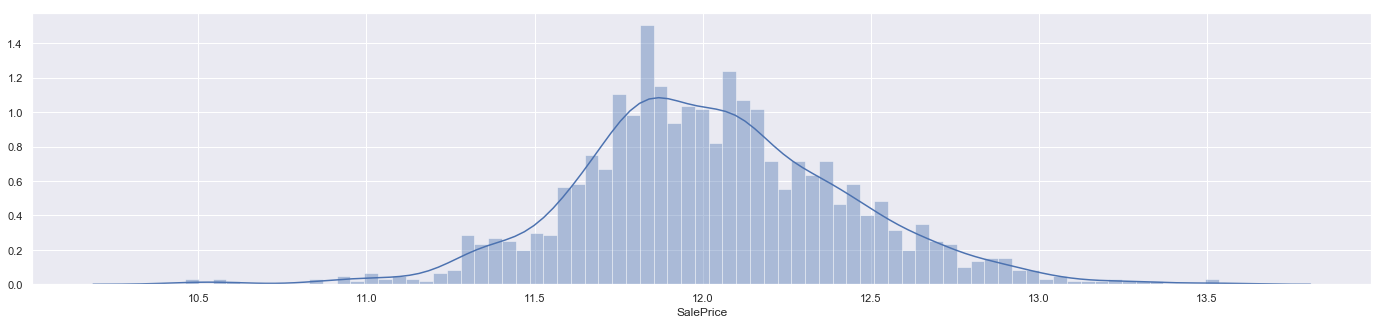

In [60]:
sns.distplot( train_y, bins = 75 )

## Create Dummy Variables

In [96]:
full_df = train_X.append( test_X )
full_df = pd.get_dummies( full_df )
train_X = full_df[ :1460 ]
test_X  = full_df[ 1460: ]

## Standardize Features

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler  = MinMaxScaler()
train_X = pd.DataFrame( scaler.fit_transform( train_X, train_y ) )

In [83]:
test_X.fillna( 0.0, inplace = True )

In [84]:
test_X = pd.DataFrame( scaler.transform( test_X ) )

In [87]:
train_X.head( 5 )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242
0,0.150685,0.366271,0.000000,1.0,1.0,1.0,0.666667,0.500,0.949275,0.883333,0.716038,0.666667,0.5,0.8,0.75,0.25,1.000000,0.759508,0.166667,0.0,0.646838,0.367382,1.00,0.355839,0.413559,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.0,0.936364,0.666667,0.50,0.386460,0.6,0.6,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.391245,0.000000,1.0,1.0,1.0,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.5,0.8,0.75,1.00,0.833333,0.797188,0.166667,0.0,0.728731,0.541631,1.00,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.690909,0.666667,0.50,0.324401,0.6,0.6,0.843935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.422289,0.333333,1.0,1.0,1.0,0.666667,0.500,0.934783,0.866667,0.690361,0.666667,0.5,0.8,0.75,0.50,1.000000,0.716357,0.166667,0.0,0.783246,0.394850,1.00,0.383123,0.419370,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.918182,0.666667,0.50,0.428773,0.6,0.6,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0

## XGBoost Classifier

In [97]:
from sklearn.model_selection import GridSearchCV
from xgboost                 import XGBRegressor

In [89]:
param_grid = { 'learning_rate'    : [ 0.01, 0.1 ],
               'max_depth'        : [ 4, 5, 6 ],
               'subsample'        : [ 0.75, 1 ],
               'colsample_bytree' : [ 0.5, 0.75, 1 ],
               'n_estimators'     : [ 100 ],
               'reg_alpha'        : [ 0.25, 0.5, 0.75, 1 ],
               'reg_lambda'       : [ 0.25, 0.5, 0.75, 1 ] }

xgbm = GridSearchCV( XGBRegressor(), cv = 5 param_grid = param_grid, n_jobs = 5, scoring = 'neg_mean_squared_error')
xgbm.fit( train_X, train_y )

In [92]:
xgbm.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_alpha': 0.25,
 'reg_lambda': 0.5,
 'subsample': 1}

In [93]:
colsample_bytree_best = xgbm.best_params_[ 'colsample_bytree' ]
gamma_best            = xgbm.best_params_[ 'gamma' ]
learning_rate_best    = xgbm.best_params_[ 'learning_rate' ]
max_depth_best        = xgbm.best_params_[ 'max_depth' ]
n_estimators_best     = xgbm.best_params_[ 'n_estimators' ]
reg_alpha_best        = xgbm.best_params_[ 'reg_alpha' ]
reg_lambda_best       = xgbm.best_params_[ 'reg_lambda' ]
subsample_best        = xgbm.best_params_[ 'subsample' ]

In [94]:
xgbm = XGBRegressor( n_estimators     = n_estimators_best,
                     silent           = 1,
                     gamma            = gamma_best,
                     reg_alpha        = reg_alpha_best,
                     reg_lambda       = reg_lambda_best,
                     max_depth        = max_depth_best,
                     learning_rate    = learning_rate_best,
                     subsample        = subsample_best,
                     colsample_bytree = colsample_bytree_best )

In [95]:
xgbm.fit( train_X, train_y )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.25, reg_lambda=0.5, scale_pos_weight=1, seed=None,
       silent=1, subsample=1)

In [96]:
predictions = np.exp( xgbm.predict( test_X ) )

## Create Submission

In [98]:
submission = pd.DataFrame(
    {'Id'        : df[0][ 'Id' ],
     'SalePrice' : predictions
    }
)

submission.to_csv( './submissions/ames_housing_xgbm.csv', index = False )

In [99]:
submission.head(5)

,Id,SalePrice
0,1461,119981.882812
1,1462,163243.984375
2,1463,184408.984375
3,1464,197886.875000
4,1465,190653.265625


This scored an RMSE of $0.12996$ based on the grader used from Kaggle:  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard